In [ ]:
!pip install pygimli tetgen
!sudo apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

# Field data inversion ("Koenigsee")

In [ ]:
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.physics.traveltime as tt

from latex import latexify
latexify(columns=2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
data = pg.getExampleData("traveltime/koenigsee.sgt", verbose=True)
print(data)

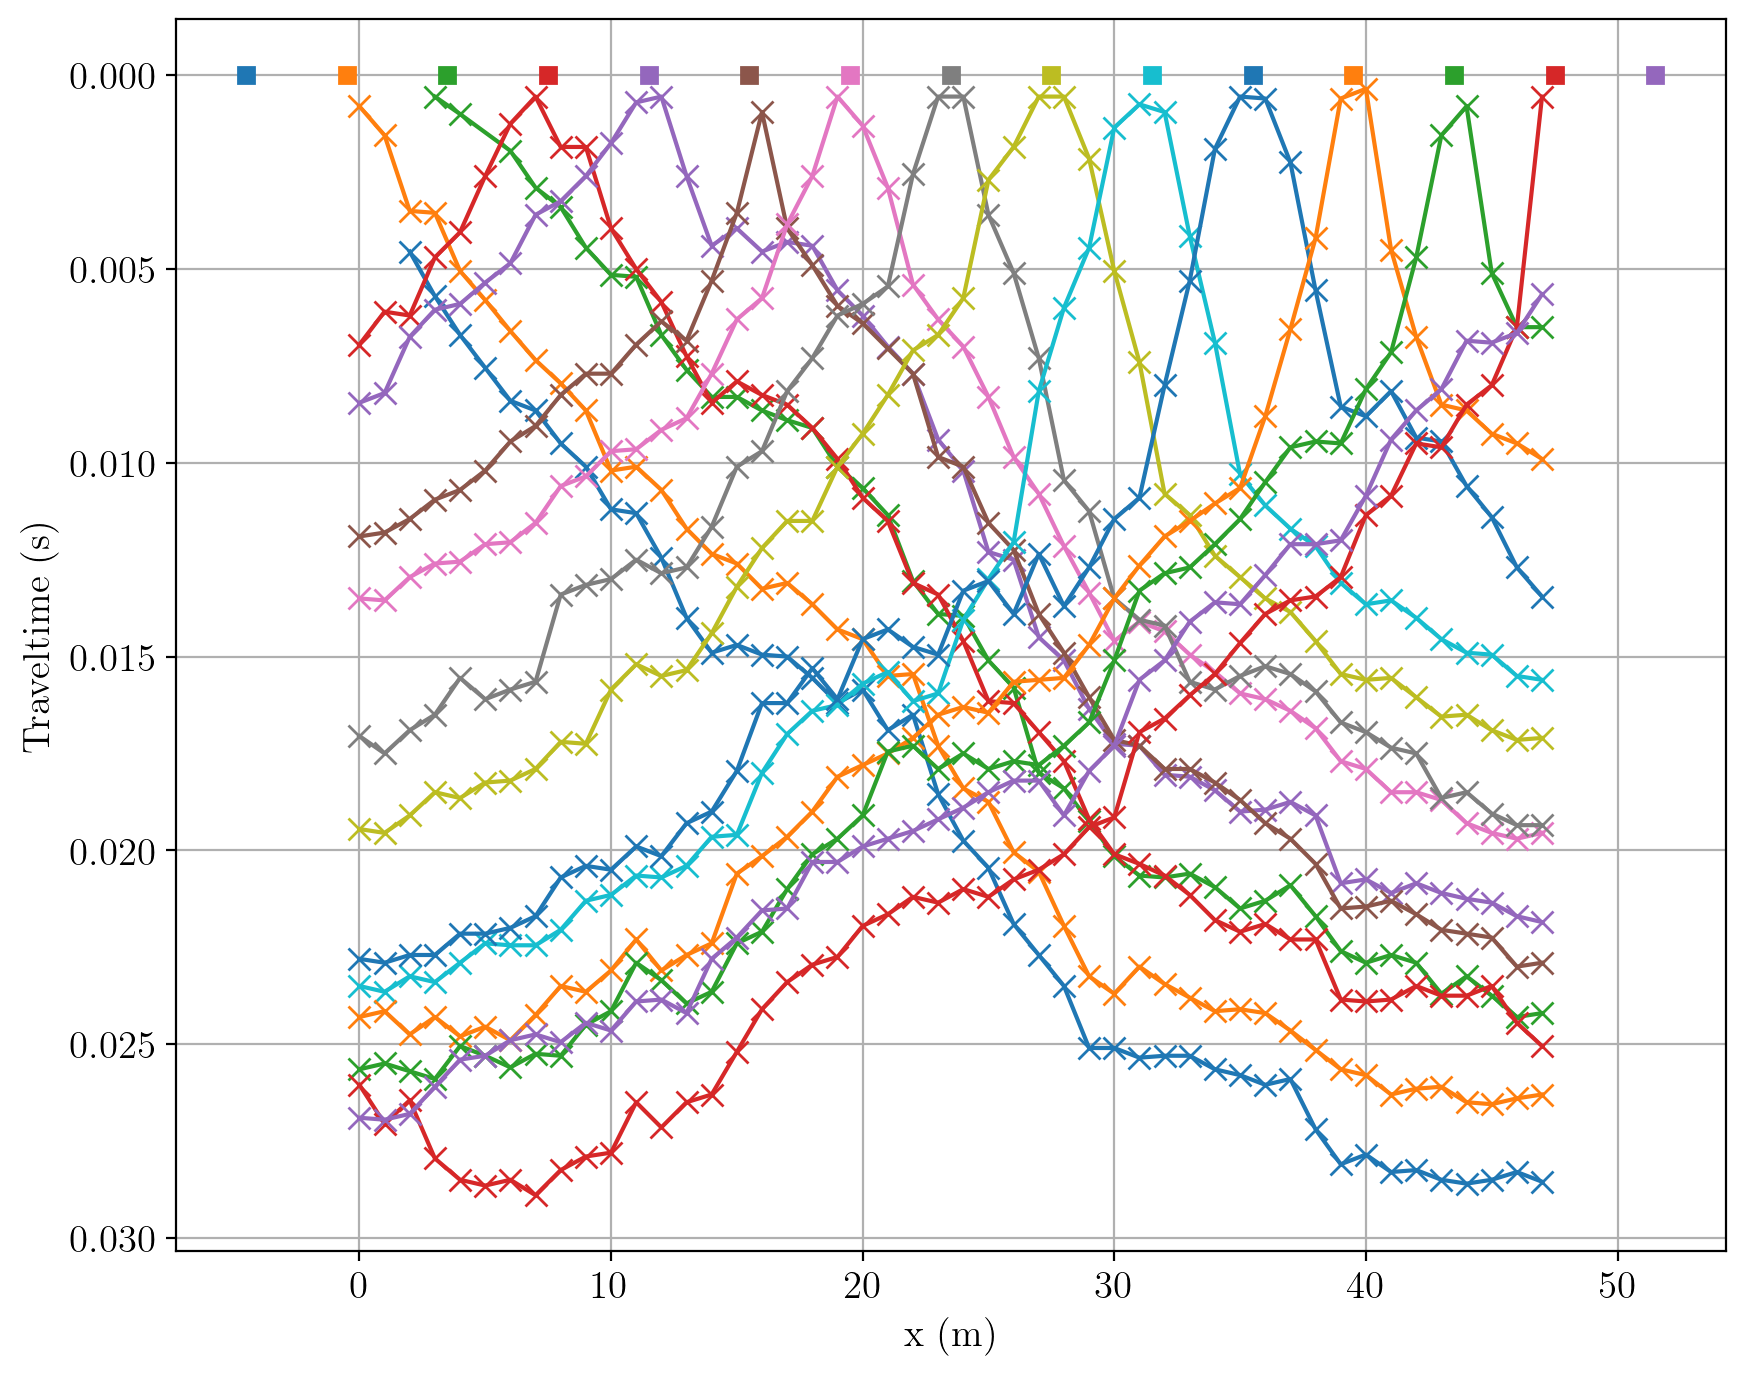

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
lines = tt.drawFirstPicks(ax, data)

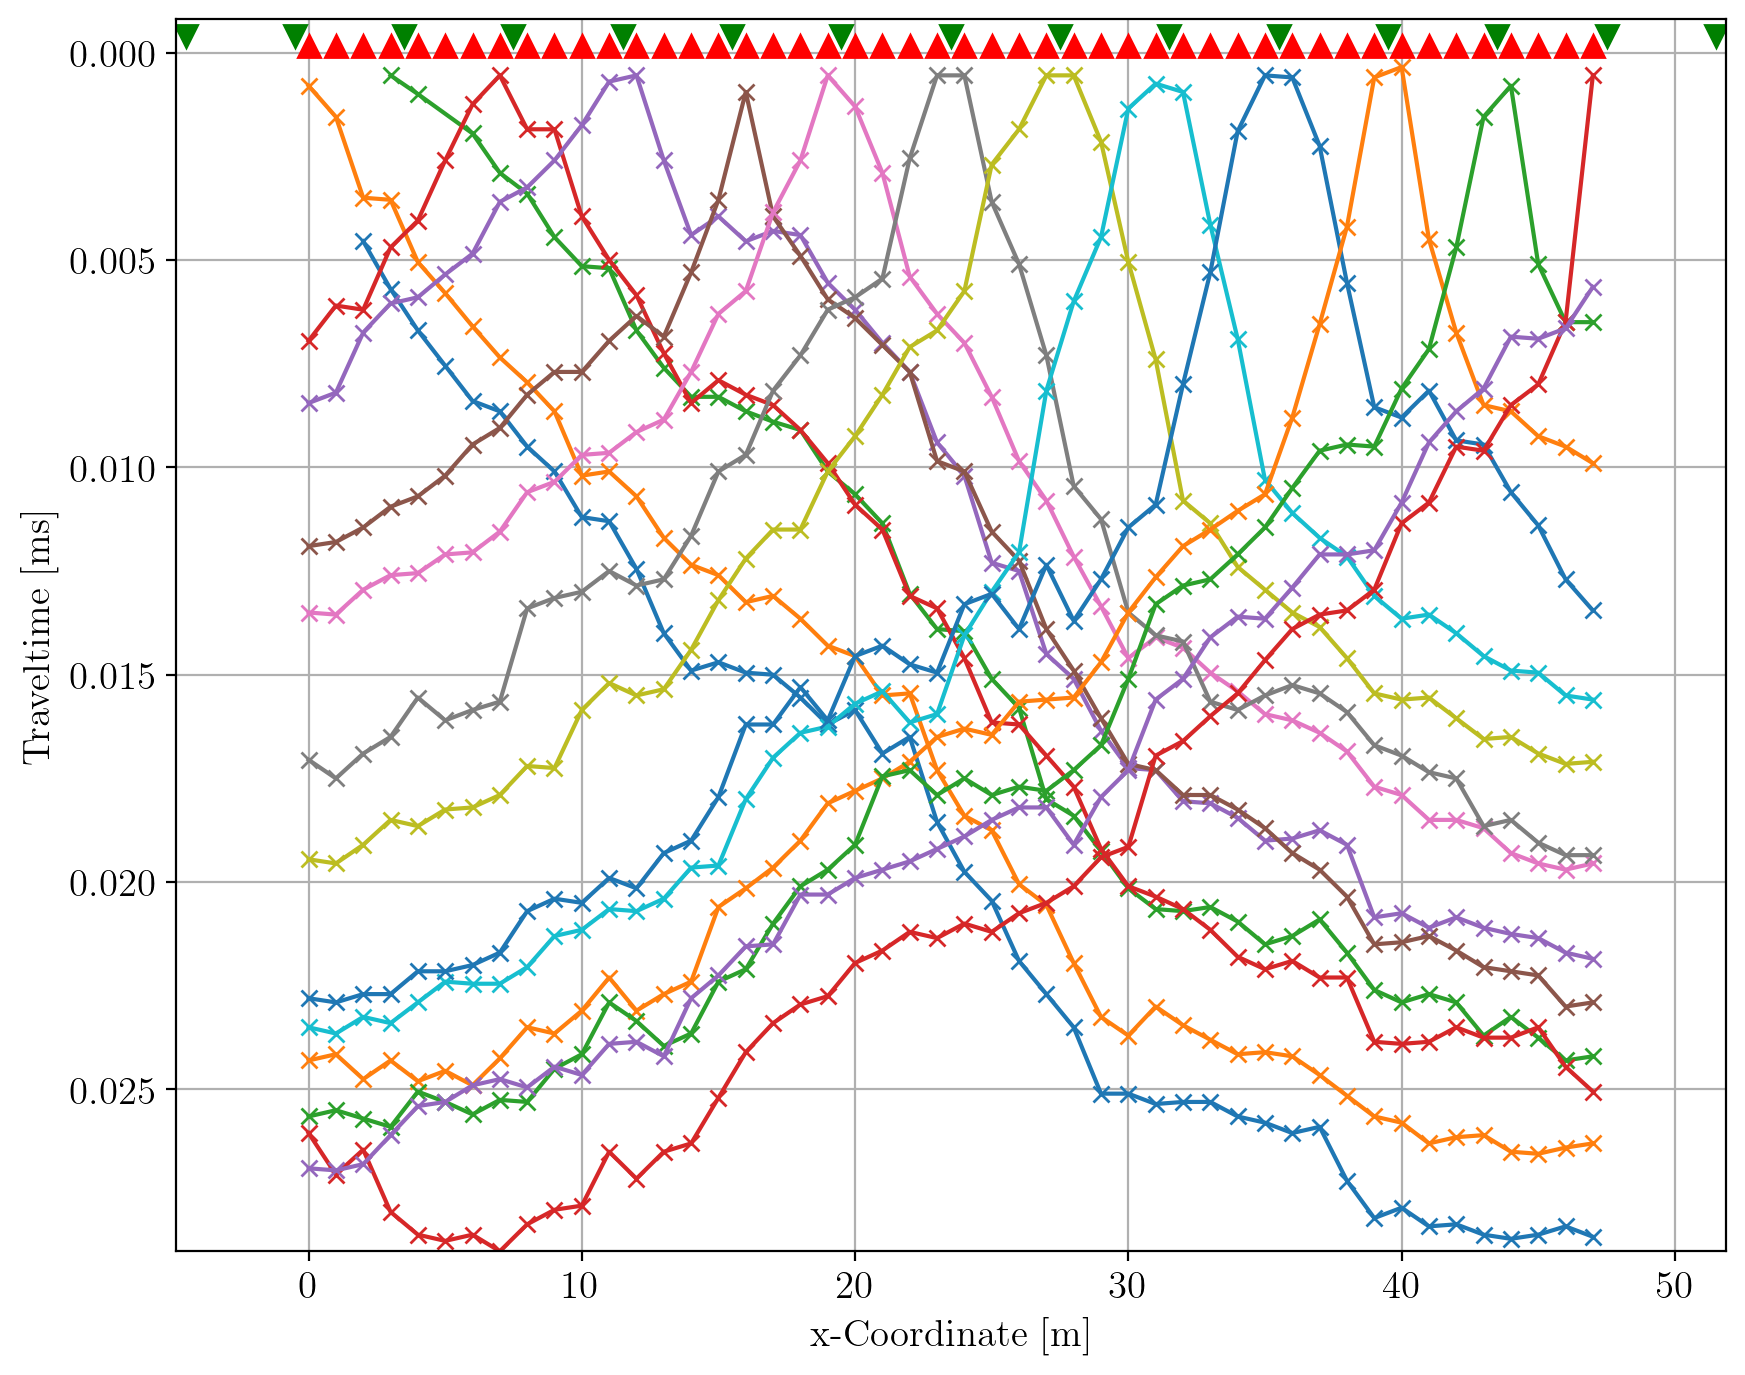

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
lines = tt.drawTravelTimeData(ax, data)

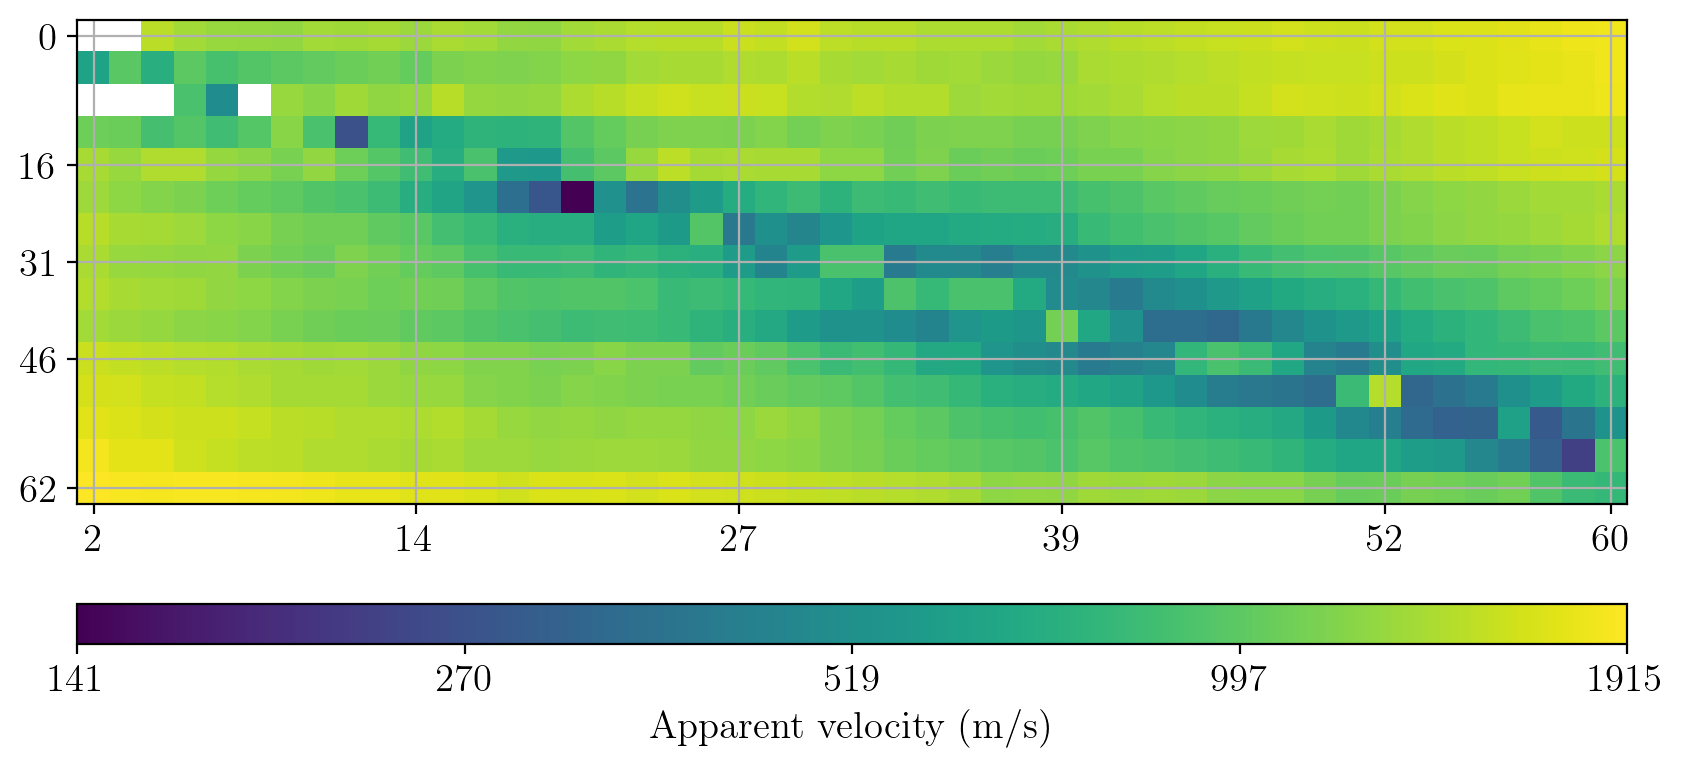

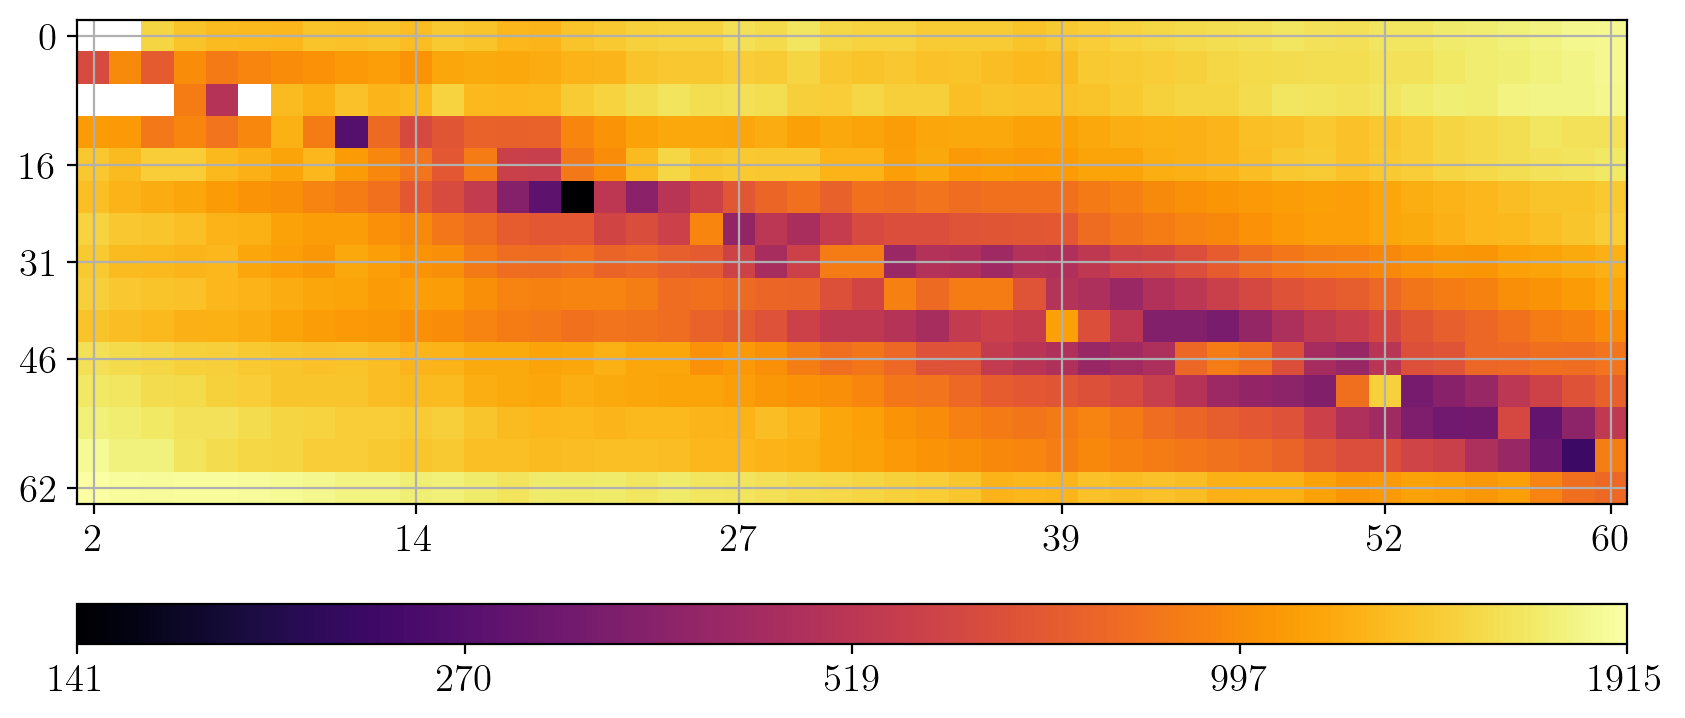

In [6]:
mgr = tt.TravelTimeManager(data)
fig, ax = plt.subplots(figsize=(10, 5))
ax, cbar = mgr.showData(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax, cb = tt.showVA(data, usePos=False, ax=ax, cMap='inferno')
plt.show()

Finally, we call the `invert` method and plot the result.The mesh is created
based on the sensor positions on-the-fly.



In [7]:
mgr.invert(secNodes=3, paraMaxCellSize=5.0,
           zWeight=0.2, vTop=500, vBottom=5000, verbose=1)

INFO:pyGIMLi:Found 1 regions.
31/10/25 - 15:52:09 - pyGIMLi - INFO - Found 1 regions.
INFO:pyGIMLi:Found 1 regions.
31/10/25 - 15:52:09 - pyGIMLi - INFO - Found 1 regions.
ERROR:pyGIMLi:<class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(TravelTimeManager.py:105)
DataContainer has no "err" values. Fallback to 3%
31/10/25 - 15:52:10 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(TravelTimeManager.py:105)
DataContainer has no "err" values. Fallback to 3%
INFO:pyGIMLi:Creating forward mesh from region infos.
31/10/25 - 15:52:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
INFO:pyGIMLi:Creating refined mesh (secnodes: 3) to solve forward task.
31/10/25 - 15:52:10 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
INFO:pyGIMLi:Create gradient starting model. 500: 5000
31/10/25 - 15:52:10 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
INFO:pyGIMLi:C

fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x7a2a4d394360>
Data transformation: Identity transform
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 3.5e-04/0.03
min/max (error): 3%/3%
min/max (start model): 2.0e-04/0.002
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  156.33
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   12.31 (dPhi = 91.50%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.91 (dPhi = 27.36%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.71 (dPhi = 24.19%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    6.10 (dPhi = 8.65%) lam: 20.0
------------------

1090 [905.8543643939366,...,2650.6913731728523]

Look at the fit between measured (crosses) and modelled (lines) traveltimes.



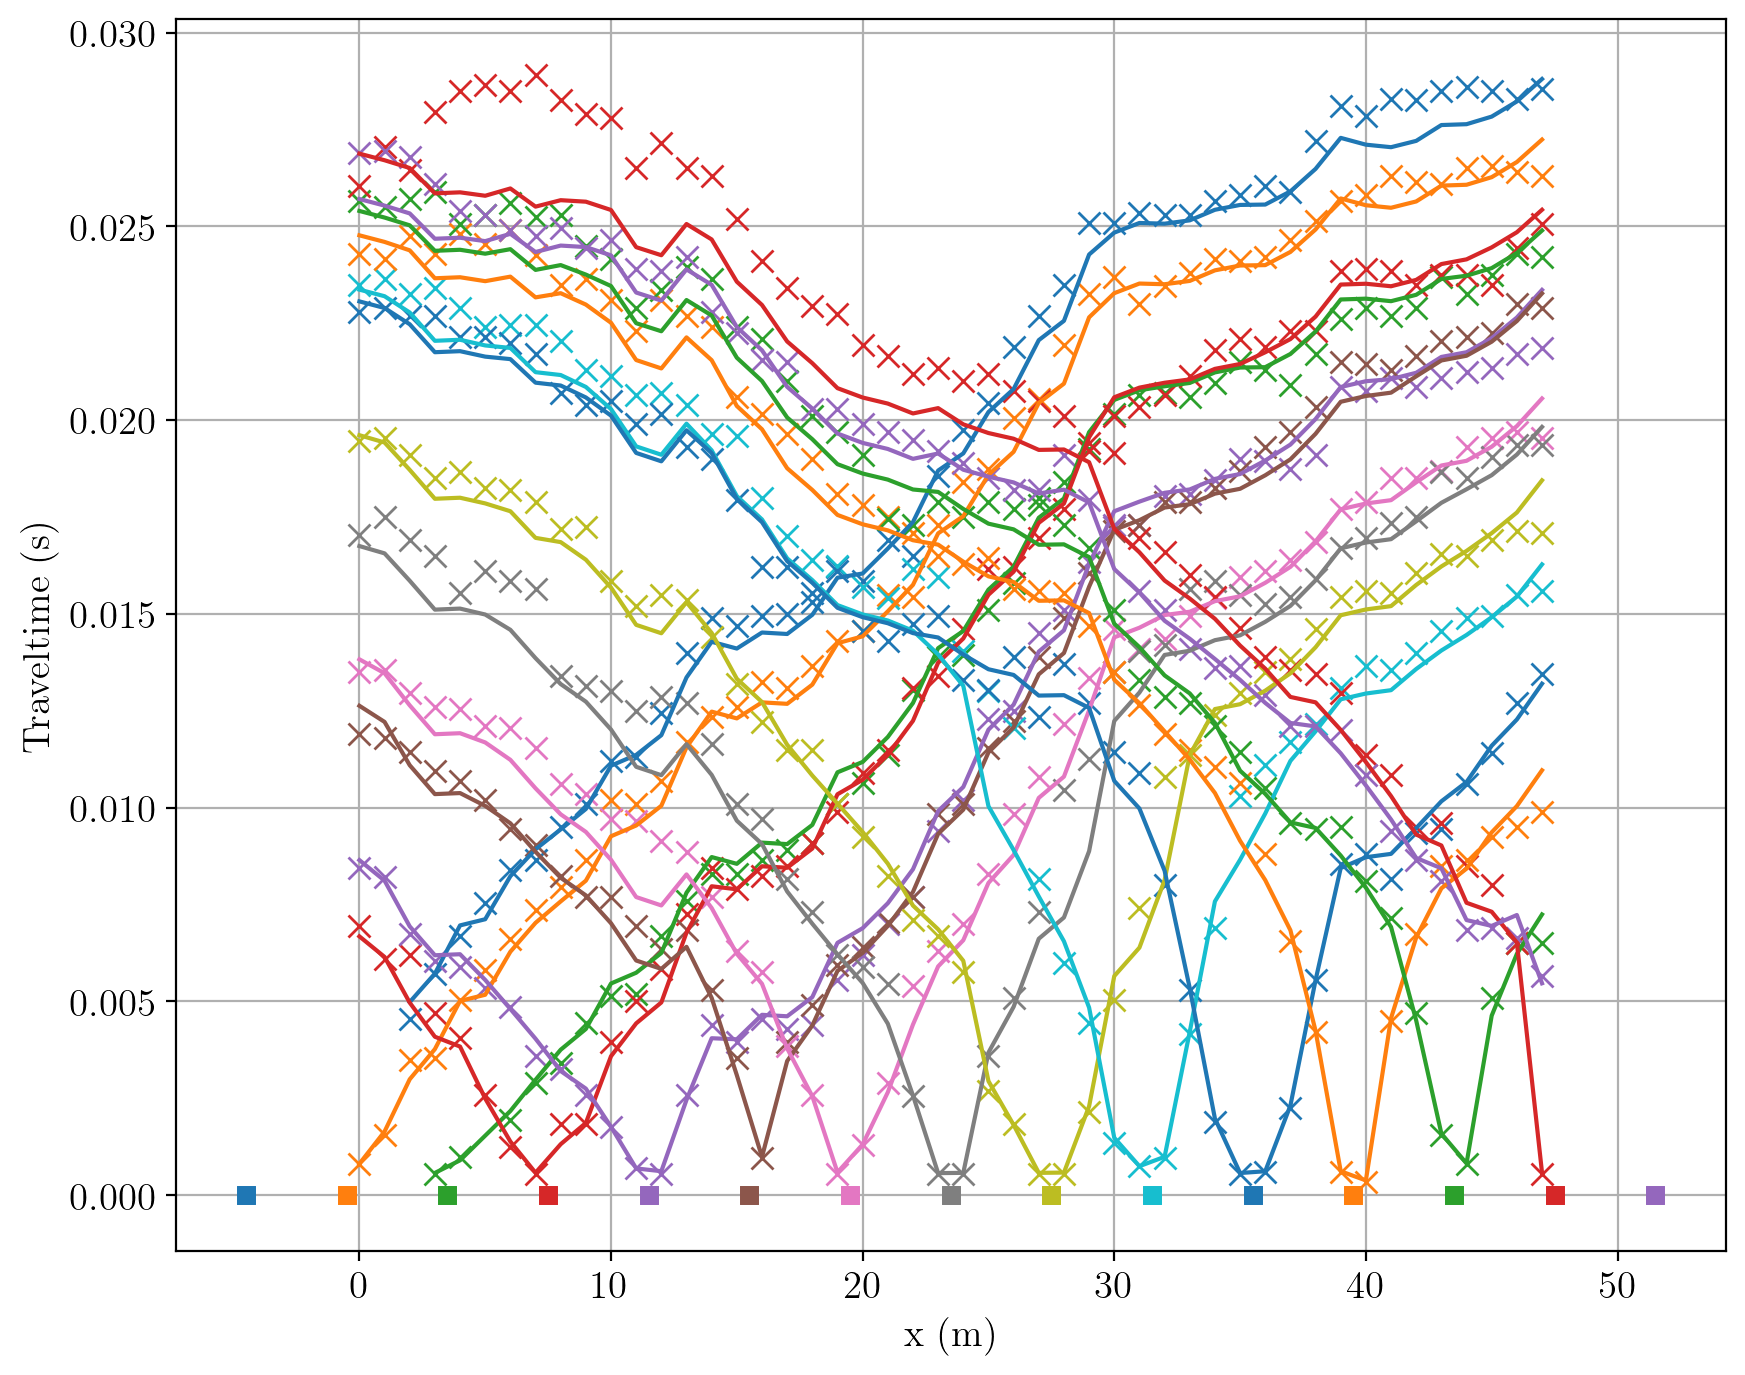

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
mgr.showFit(firstPicks=True, ax=ax)

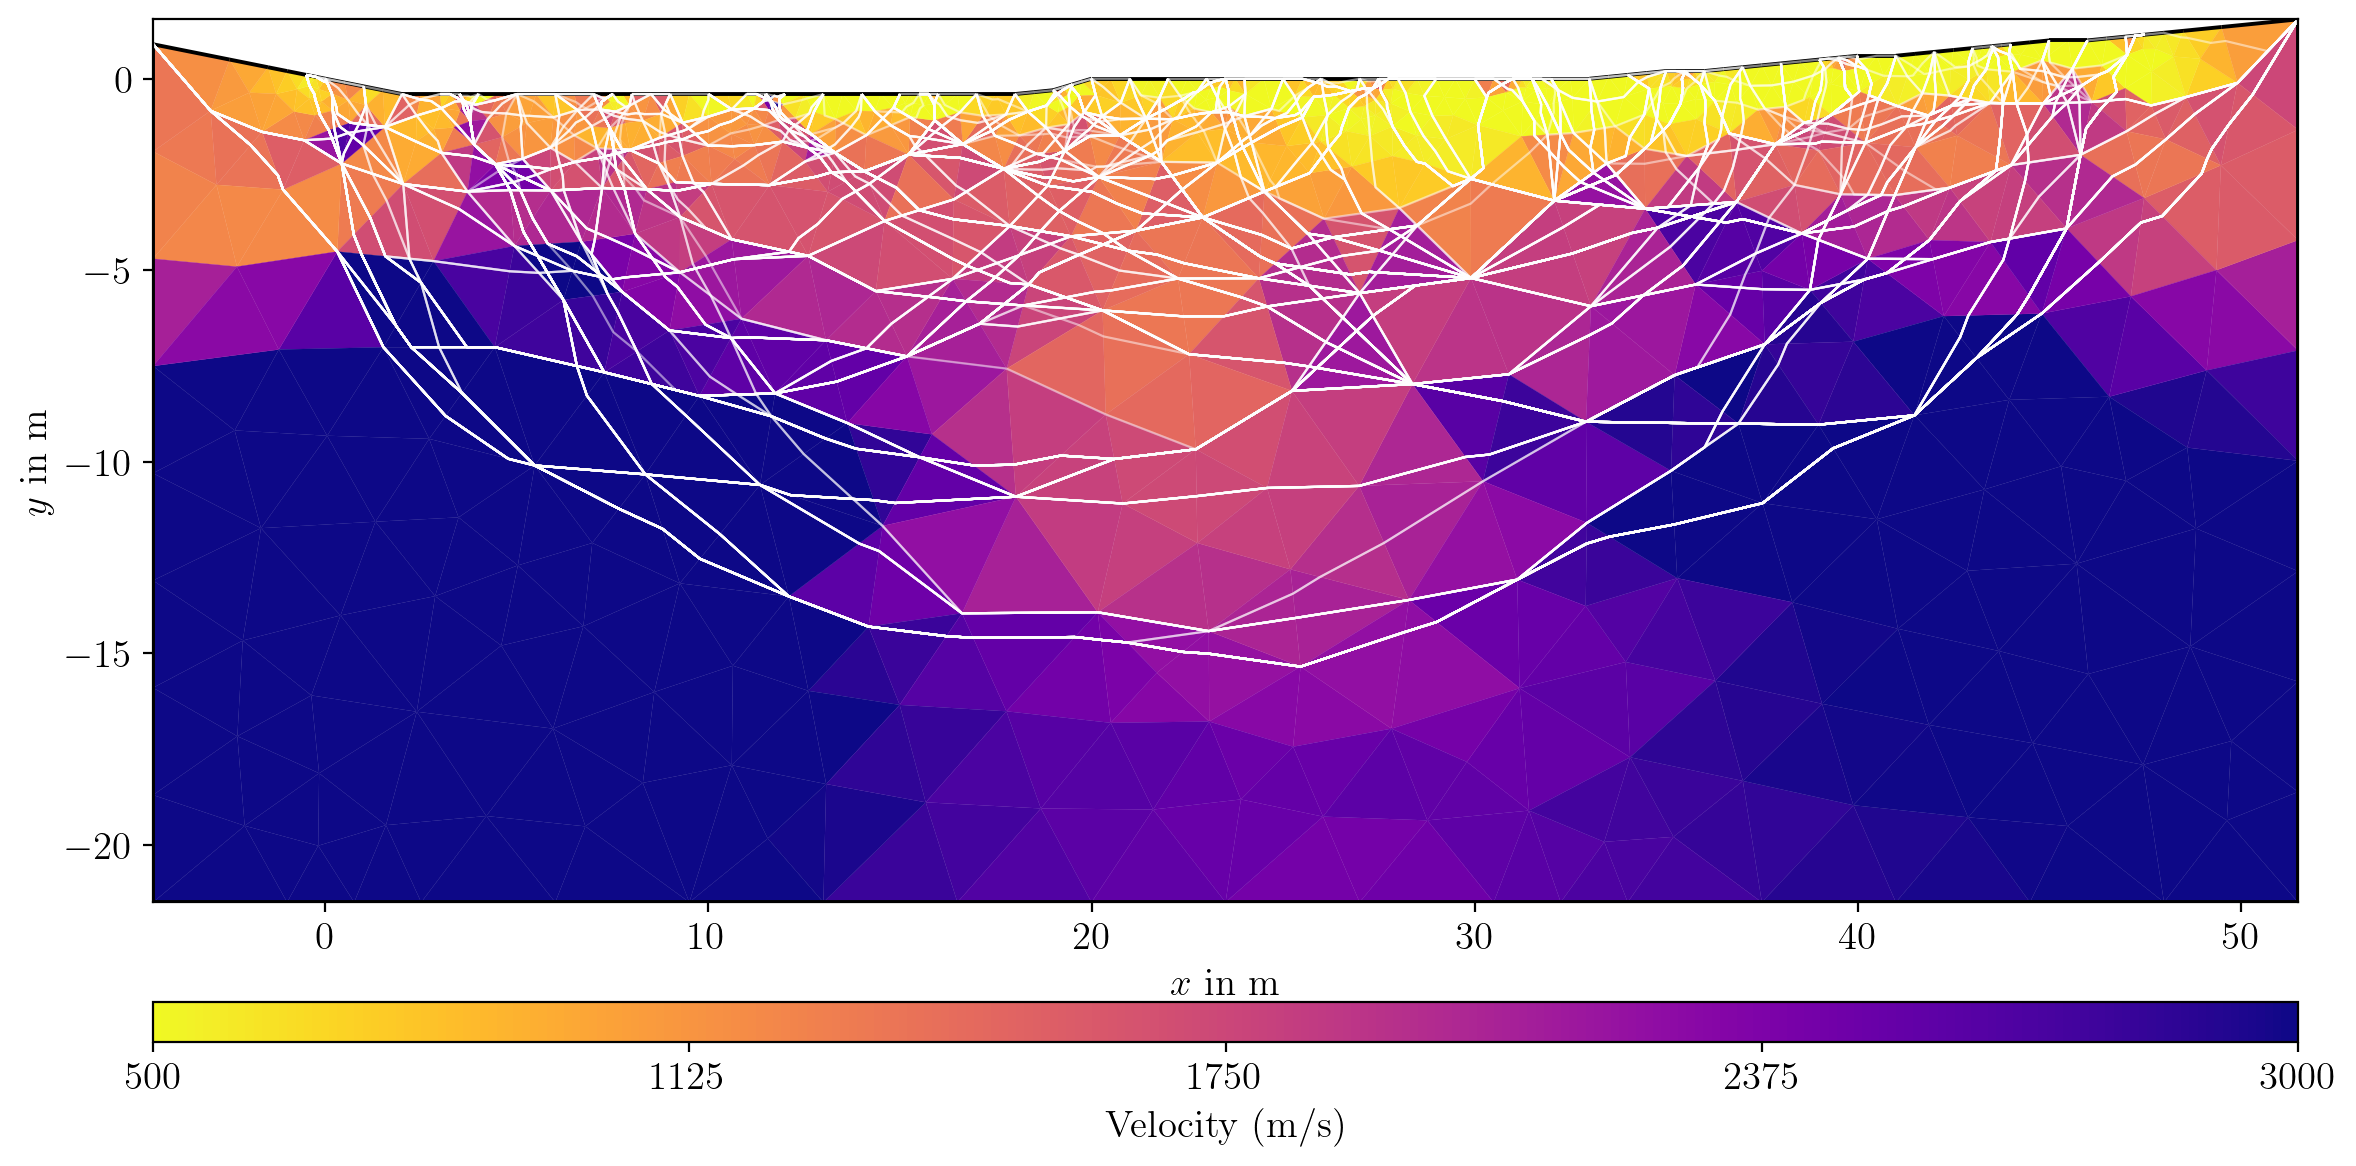

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
ax, cbar = mgr.showResult(logScale=False, cMin=500, cMax=3000, ax=ax, cMap="plasma_r")
rays = mgr.drawRayPaths(ax=ax, color="white",lw=0.8, alpha=0.5)